In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/AI_Summer_Training/data_files/AirPassengers.csv')
origData = data.copy()
origData['Month'] = pd.to_datetime(origData['Month'])
origData.set_index('Month',inplace=True)
print(data.shape)
data.head()

(144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [25]:
data = data.iloc[0:120]
data.tail()

,Month,#Passengers
115,1958-08,505
116,1958-09,404
117,1958-10,359
118,1958-11,310
119,1958-12,337


In [26]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month',inplace=True)


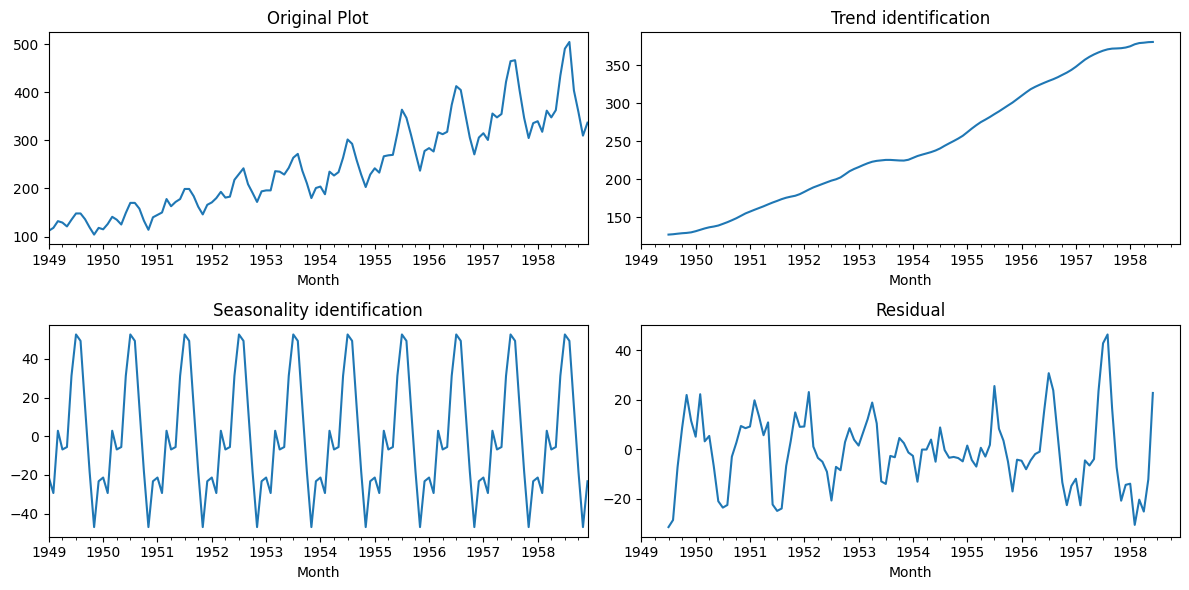

In [27]:
from statsmodels.tsa import seasonal,arima_model
import matplotlib.pyplot as plt
import statsmodels.api as st

tempData = data['#Passengers']
var = seasonal.seasonal_decompose(tempData)

plt.figure(1,(12,6))
plt.subplot(2,2,1)
var.observed.plot()
plt.title('Original Plot')
plt.subplot(2,2,2)
var.trend.plot()
plt.title('Trend identification')

plt.subplot(2,2,3)
var.seasonal.plot()
plt.title('Seasonality identification')

plt.subplot(2,2,4)
var.resid.plot()
plt.title('Residual')

plt.tight_layout()
plt.show()


In [13]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.4 MB/s eta 0:00:00


In [20]:
from pmdarima import auto_arima

auto_arima(tempData,seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=813.750, Time=2.12 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=910.236, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=810.646, Time=0.47 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=860.575, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1060.479, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=809.411, Time=0.11 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=810.721, Time=0.34 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=812.509, Time=1.37 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=808.863, Time=0.31 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=810.482, Time=1.36 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=810.553, Time=1.35 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AIC=809.375, Time=0.24 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=809.672, Time=0.26 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept  

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [28]:
tempData = data['#Passengers']
num_samples = 24

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(2,0,0),seasonal_order=(0,1,0,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for = sarima_model.forecast()
  tempData = pd.concat([tempData, value_for])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

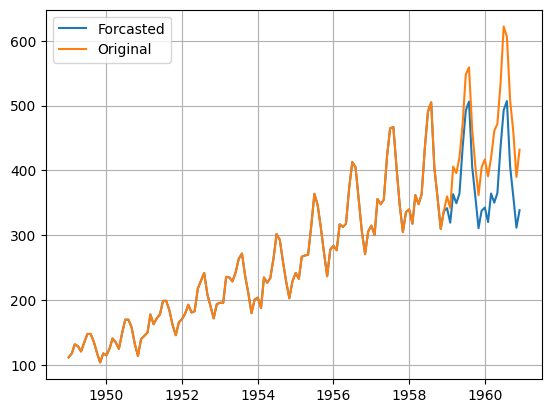

In [29]:
plt.figure(1)
plt.plot(tempData,label='Forcasted')
plt.plot(origData,label='Original')
plt.legend()
plt.grid('on')

In [39]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/AI_Summer_Training/data_files/milk_production_dataset.csv')
data = data.dropna(axis=0)
data.head()

,Month,Monthly milk production
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [40]:
data = data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    168 non-null    object 
 1   Monthly milk production  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB


TypeError: 'NoneType' object is not subscriptable

In [42]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/AI_Summer_Training/data_files/milk_production_dataset.csv')
data = data.dropna(axis=0)
data.head()

# Print the info instead of overwriting the DataFrame
data.info()

data['Month'] = pd.to_datetime(data['Month'])


<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    168 non-null    object 
 1   Monthly milk production  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB
